In [1]:
'''
    Freefall Detector / Motion Classifier
    
    Based on acceleromter data, classifies the 4 following types of motion:
        1. Steady state - no motion sitting flat on a immobile surface
        2. Freefall from a height of 31"
        3. Tilt Left 90 degress on a flat surface (in SensorTile cradle+)
        4. Tilt Right 90 degress on a flat surface (in SensorTile cradle+)
'''

'\n    Freefall Detector / Motion Classifier\n    \n    Based on acceleromter data, classifies the 4 following types of motion:\n        1. Steady state - no motion sitting flat on a immobile surface\n        2. Freefall from a height of 31"\n        3. Tilt Left 90 degress on a flat surface (in SensorTile cradle+)\n        4. Tilt Right 90 degress on a flat surface (in SensorTile cradle+)\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

In [3]:
## Read the data for the motions of the class: Freefall label :1
pathfile1_1 = 'csv/31_inches/drop1_Accelerometer.csv'
pathfile1_2 = 'csv/31_inches/drop2_Accelerometer.csv'
pathfile1_3 = 'csv/31_inches/drop3_Accelerometer.csv'
pathfile1_4 = 'csv/31_inches/drop4_Accelerometer.csv'
pathfile1_5 = 'csv/31_inches/drop5_Accelerometer.csv'
pathfile1_6 = 'csv/31_inches/drop6_Accelerometer.csv'

#Read the data for the motions of the class: Steady label :2
pathfile2_1 = 'csv/31_inches/steady_1_Accelerometer.csv'
pathfile2_2 = 'csv/31_inches/steady_2_Accelerometer.csv'
pathfile2_3 = 'csv/31_inches/steady_3_Accelerometer.csv'
pathfile2_4 = 'csv/31_inches/steady_4_Accelerometer.csv'
pathfile2_5 = 'csv/31_inches/steady_5_Accelerometer.csv'
pathfile2_6 = 'csv/31_inches/steady_6_Accelerometer.csv'

#Read the data for the motions of the class: Tilt Left 90 degrees label :3
pathfile3_1 = 'csv/31_inches/tilt_left_1_Accelerometer.csv'
pathfile3_2 = 'csv/31_inches/tilt_left_2_Accelerometer.csv'
pathfile3_3 = 'csv/31_inches/tilt_left_3_Accelerometer.csv'
pathfile3_4 = 'csv/31_inches/tilt_left_4_Accelerometer.csv'
pathfile3_5 = 'csv/31_inches/tilt_left_5_Accelerometer.csv'
pathfile3_6 = 'csv/31_inches/tilt_left_6_Accelerometer.csv'

#Read the data for the motions of the class: Tilt Right 90 degrees label :4
pathfile4_1 = 'csv/31_inches/tilt_right_1_Accelerometer.csv'
pathfile4_2 = 'csv/31_inches/tilt_right_2_Accelerometer.csv'
pathfile4_3 = 'csv/31_inches/tilt_right_3_Accelerometer.csv'
pathfile4_4 = 'csv/31_inches/tilt_right_4_Accelerometer.csv'
pathfile4_5 = 'csv/31_inches/tilt_right_5_Accelerometer.csv'
pathfile4_6 = 'csv/31_inches/tilt_right_6_Accelerometer.csv'

# select 6 Freefalls of the class 1
df1_1 = pandas.read_csv(pathfile1_1, skiprows=0)
df2_1 = pandas.read_csv(pathfile1_2, skiprows=0)
df3_1 = pandas.read_csv(pathfile1_3, skiprows=0)
df4_1 = pandas.read_csv(pathfile1_4, skiprows=0)
df5_1 = pandas.read_csv(pathfile1_5, skiprows=0)
df6_1 = pandas.read_csv(pathfile1_6, skiprows=0)

# select 6 Steady states of the class 2
df1_2 = pandas.read_csv(pathfile2_1, skiprows=0)
df2_2 = pandas.read_csv(pathfile2_2, skiprows=0)
df3_2 = pandas.read_csv(pathfile2_3, skiprows=0)
df4_2 = pandas.read_csv(pathfile2_4, skiprows=0)
df5_2 = pandas.read_csv(pathfile2_5, skiprows=0)
df6_2 = pandas.read_csv(pathfile2_6, skiprows=0)

# select 6 Tilt Left states of the class 3
df1_3 = pandas.read_csv(pathfile3_1, skiprows=0)
df2_3 = pandas.read_csv(pathfile3_2, skiprows=0)
df3_3 = pandas.read_csv(pathfile3_3, skiprows=0)
df4_3 = pandas.read_csv(pathfile3_4, skiprows=0)
df5_3 = pandas.read_csv(pathfile3_5, skiprows=0)
df6_3 = pandas.read_csv(pathfile3_6, skiprows=0)

# select 6 Tilt Right states of the class 4
df1_4 = pandas.read_csv(pathfile4_1, skiprows=0)
df2_4 = pandas.read_csv(pathfile4_2, skiprows=0)
df3_4 = pandas.read_csv(pathfile4_3, skiprows=0)
df4_4 = pandas.read_csv(pathfile4_4, skiprows=0)
df5_4 = pandas.read_csv(pathfile4_5, skiprows=0)
df6_4 = pandas.read_csv(pathfile4_6, skiprows=0)

accX1_1 = df1_1['X (mg)']
accY1_1 = df1_1['Y (mg)']
accZ1_1 = df1_1['Z (mg)']

accX1_1d = accX1_1.describe()

In [4]:
#df1_1.describe()

In [5]:
#Magnitude of Accel for all 6 motions of class 1
acc1_1 = df1_1['X (mg)']**2 + df1_1['Y (mg)']**2 + df1_1['Z (mg)']**2
acc1_1 = np.sqrt(acc1_1)
acc2_1 = df2_1['X (mg)']**2 + df2_1['Y (mg)']**2 + df2_1['Z (mg)']**2
acc2_1 = np.sqrt(acc2_1)
acc3_1 = df3_1['X (mg)']**2 + df3_1['Y (mg)']**2 + df3_1['Z (mg)']**2
acc3_1 = np.sqrt(acc3_1)
acc4_1 = df4_1['X (mg)']**2 + df4_1['Y (mg)']**2 + df4_1['Z (mg)']**2
acc4_1 = np.sqrt(acc4_1)
acc5_1 = df5_1['X (mg)']**2 + df5_1['Y (mg)']**2 + df5_1['Z (mg)']**2
acc5_1 = np.sqrt(acc5_1)
acc6_1 = df6_1['X (mg)']**2 + df6_1['Y (mg)']**2 + df6_1['Z (mg)']**2
acc6_1 = np.sqrt(acc6_1)

#Magnitude of Accel for all 6 motions of class 2
acc1_2 = df1_2['X (mg)']**2 + df1_2['Y (mg)']**2 + df1_2['Z (mg)']**2
acc1_2 = np.sqrt(acc1_2)
acc2_2 = df2_2['X (mg)']**2 + df2_2['Y (mg)']**2 + df2_2['Z (mg)']**2
acc2_2 = np.sqrt(acc2_2)
acc3_2 = df3_2['X (mg)']**2 + df3_2['Y (mg)']**2 + df3_2['Z (mg)']**2
acc3_2 = np.sqrt(acc3_2)
acc4_2 = df4_2['X (mg)']**2 + df4_2['Y (mg)']**2 + df4_2['Z (mg)']**2
acc4_2 = np.sqrt(acc4_2)
acc5_2 = df5_2['X (mg)']**2 + df5_2['Y (mg)']**2 + df5_2['Z (mg)']**2
acc5_2 = np.sqrt(acc5_2)
acc6_2 = df6_2['X (mg)']**2 + df6_2['Y (mg)']**2 + df6_2['Z (mg)']**2
acc6_2 = np.sqrt(acc6_2)

#Magnitude of Accel for all 6 motions of class 3
acc1_3 = df1_3['X (mg)']**2 + df1_3['Y (mg)']**2 + df1_3['Z (mg)']**2
acc1_3 = np.sqrt(acc1_3)
acc2_3 = df2_3['X (mg)']**2 + df2_3['Y (mg)']**2 + df2_3['Z (mg)']**2
acc2_3 = np.sqrt(acc2_3)
acc3_3 = df3_3['X (mg)']**2 + df3_3['Y (mg)']**2 + df3_3['Z (mg)']**2
acc3_3 = np.sqrt(acc3_3)
acc4_3 = df4_3['X (mg)']**2 + df4_3['Y (mg)']**2 + df4_3['Z (mg)']**2
acc4_3 = np.sqrt(acc4_3)
acc5_3 = df5_3['X (mg)']**2 + df5_3['Y (mg)']**2 + df5_3['Z (mg)']**2
acc5_3 = np.sqrt(acc5_3)
acc6_3 = df6_3['X (mg)']**2 + df6_3['Y (mg)']**2 + df6_3['Z (mg)']**2
acc6_3 = np.sqrt(acc6_3)

#Magnitude of Accel for all 6 motions of class 4
acc1_4 = df1_4['X (mg)']**2 + df1_4['Y (mg)']**2 + df1_4['Z (mg)']**2
acc1_4 = np.sqrt(acc1_4)
acc2_4 = df2_4['X (mg)']**2 + df2_4['Y (mg)']**2 + df2_4['Z (mg)']**2
acc2_4 = np.sqrt(acc2_4)
acc3_4 = df3_4['X (mg)']**2 + df3_4['Y (mg)']**2 + df3_4['Z (mg)']**2
acc3_4 = np.sqrt(acc3_4)
acc4_4 = df4_4['X (mg)']**2 + df4_4['Y (mg)']**2 + df4_4['Z (mg)']**2
acc4_4 = np.sqrt(acc4_4)
acc5_4 = df5_4['X (mg)']**2 + df5_4['Y (mg)']**2 + df5_4['Z (mg)']**2
acc5_4 = np.sqrt(acc5_4)
acc6_4 = df6_4['X (mg)']**2 + df6_4['Y (mg)']**2 + df6_4['Z (mg)']**2
acc6_4 = np.sqrt(acc6_4)


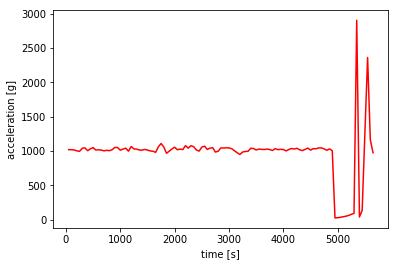

In [6]:
HostTime1_1 = df1_1['HostTimestamp']
acc1_1=np.array(acc1_1)
HostTime1_1 = np.array(HostTime1_1)
duration1 = HostTime1_1[-1]
samples1 = int(len(HostTime1_1)/duration1)
plt.plot(HostTime1_1,acc1_1,'r-')
plt.xlabel('time [s]')
plt.ylabel('acceleration [g]')
plt.show()

In [7]:
df1_1.head(10)

,HostTimestamp,X (mg),Y (mg),Z (mg)
0,50,-24,2,1018
1,100,-11,7,1017
2,150,-5,3,1014
3,200,-28,-14,1000
4,250,-22,-34,993
5,300,-47,-22,1037
6,350,-70,-22,1041
7,400,-60,-59,999
8,450,-51,-23,1029
9,500,-35,2,1047


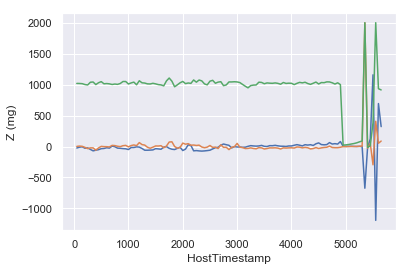

In [8]:
import seaborn as sns; sns.set(color_codes=True)
g1 = sns.lineplot(x="HostTimestamp", y="X (mg)", data=df1_1)
g2 = sns.lineplot(x="HostTimestamp", y="Y (mg)", data=df1_1)
g3 = sns.lineplot(x="HostTimestamp", y="Z (mg)", data=df1_1)

In [9]:
acc1_1[50:60]

array([1068.80353667, 1021.22573411, 1039.60521353, 1046.5796673 ,
        982.9140349 ,  994.50791852, 1043.37193752, 1042.32288663,
       1045.00956933, 1043.22960081])

In [10]:
#magnitude of acceleration for 6 motions for each class (1 to 4)
print(type(acc1_1))
acc_1_1 = pandas.concat([pandas.DataFrame(acc1_1),pandas.DataFrame(acc2_1),pandas.DataFrame(acc3_1),pandas.DataFrame(acc4_1),pandas.DataFrame(acc5_1),pandas.DataFrame(acc6_1)], axis=1)
acc_1_2 = pandas.concat([pandas.DataFrame(acc1_2),pandas.DataFrame(acc2_2),pandas.DataFrame(acc3_2),pandas.DataFrame(acc4_2),pandas.DataFrame(acc5_2),pandas.DataFrame(acc6_2)], axis=1)
acc_1_3 = pandas.concat([pandas.DataFrame(acc1_3),pandas.DataFrame(acc2_3),pandas.DataFrame(acc3_3),pandas.DataFrame(acc4_3),pandas.DataFrame(acc5_3),pandas.DataFrame(acc6_3)], axis=1)
acc_1_4 = pandas.concat([pandas.DataFrame(acc1_4),pandas.DataFrame(acc2_4),pandas.DataFrame(acc3_4),pandas.DataFrame(acc4_4),pandas.DataFrame(acc5_4),pandas.DataFrame(acc6_4)], axis=1)

<class 'numpy.ndarray'>


In [11]:
print(acc_1_1)
print(acc_1_2)
print(acc_1_3)
print(acc_1_4)

               0            0            0            0            0  \
0    1018.284832  1019.628364  1020.925560  1009.313133  1017.804500   
1    1017.083576  1019.934312  1016.874132  1021.225734  1011.614551   
2    1014.016765  1018.134078  1010.191071  1014.342644  1014.713260   
3    1000.489880  1018.322149  1018.967124  1017.281180  1017.805482   
4     993.825437  1019.718098  1014.377642  1012.725530  1015.705666   
..           ...          ...          ...          ...          ...   
108   132.778010          NaN          NaN          NaN          NaN   
109  1254.244793          NaN          NaN          NaN          NaN   
110  2361.888439          NaN          NaN          NaN          NaN   
111  1163.375262          NaN          NaN          NaN          NaN   
112   971.778781          NaN          NaN          NaN          NaN   

               0  
0    1014.775837  
1    1009.434000  
2    1021.368690  
3    1014.520084  
4    1016.793981  
..           ...  
10

In [12]:
#features that describe the magnitude of acceleration for each kick (0->5) of the class =1
acc_1_1_d_t=acc_1_1.describe().transpose()

In [13]:
type(acc_1_1_d_t.describe().transpose())

pandas.core.frame.DataFrame

In [14]:
#features that describe the magnitude of acceleration for each motion of the class =2
acc_1_2_d_t=acc_1_2.describe().transpose()

In [15]:
#features that describe the magnitude of acceleration for each kick of the class =3
acc_1_3_d_t=acc_1_3.describe().transpose()

In [16]:
#features that describe the magnitude of acceleration for each kick of the class =4
acc_1_4_d_t=acc_1_4.describe().transpose()

In [17]:
#acc_features=pandas.concat([acc_4_1_d_t,acc_4_2_d_t,acc_4_3_d_t,acc_4_4_d_t])
acc_features=pandas.concat([acc_1_1_d_t, acc_1_2_d_t, acc_1_3_d_t, acc_1_4_d_t])

In [18]:
acc_features

,count,mean,std,min,25%,50%,75%,max
0,113.0,968.583757,359.672323,23.280893,1001.179804,1019.472903,1039.423879,2903.952823
0,85.0,903.151931,356.620163,27.658633,869.678676,1018.322149,1049.839512,1419.265303
0,72.0,858.977034,417.384137,21.863211,768.168374,1003.200749,1031.115369,1693.749096
0,58.0,890.980516,506.697836,15.165751,684.412026,998.022237,1052.959616,2545.214529
0,72.0,884.524947,397.118610,14.212670,807.794353,1014.670635,1045.504179,1727.968750
0,67.0,872.201388,424.276881,21.794495,700.393712,1002.856420,1056.974109,1808.495784
0,70.0,1022.628133,28.503511,947.512005,1002.318928,1018.813389,1043.002922,1107.722890
0,71.0,1022.592810,161.165092,624.325236,980.845005,1019.628364,1068.171773,1419.265303
0,61.0,1005.519362,251.306241,284.423979,951.235512,1013.462382,1048.584284,1693.749096
0,45.0,1024.396346,227.183629,517.262989,953.174695,1016.081690,1055.064453,1567.437080


In [19]:
acc_features.to_csv('acc_features.csv', index = False)

acc_features.reset_index(inplace=True, drop=True)
acc_features

,count,mean,std,min,25%,50%,75%,max
0,113.0,968.583757,359.672323,23.280893,1001.179804,1019.472903,1039.423879,2903.952823
1,85.0,903.151931,356.620163,27.658633,869.678676,1018.322149,1049.839512,1419.265303
2,72.0,858.977034,417.384137,21.863211,768.168374,1003.200749,1031.115369,1693.749096
3,58.0,890.980516,506.697836,15.165751,684.412026,998.022237,1052.959616,2545.214529
4,72.0,884.524947,397.118610,14.212670,807.794353,1014.670635,1045.504179,1727.968750
5,67.0,872.201388,424.276881,21.794495,700.393712,1002.856420,1056.974109,1808.495784
6,70.0,1022.628133,28.503511,947.512005,1002.318928,1018.813389,1043.002922,1107.722890
7,71.0,1022.592810,161.165092,624.325236,980.845005,1019.628364,1068.171773,1419.265303
8,61.0,1005.519362,251.306241,284.423979,951.235512,1013.462382,1048.584284,1693.749096
9,45.0,1024.396346,227.183629,517.262989,953.174695,1016.081690,1055.064453,1567.437080


In [20]:
motions = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
labels = pandas.DataFrame(motions, columns= ['motionClass'])
labels

,motionClass
0,1
1,1
2,1
3,1
4,1
5,1
6,2
7,2
8,2
9,2


In [21]:
features_and_labels = pandas.concat([acc_features,labels], axis=1)
features_and_labels

,count,mean,std,min,25%,50%,75%,max,motionClass
0,113.0,968.583757,359.672323,23.280893,1001.179804,1019.472903,1039.423879,2903.952823,1
1,85.0,903.151931,356.620163,27.658633,869.678676,1018.322149,1049.839512,1419.265303,1
2,72.0,858.977034,417.384137,21.863211,768.168374,1003.200749,1031.115369,1693.749096,1
3,58.0,890.980516,506.697836,15.165751,684.412026,998.022237,1052.959616,2545.214529,1
4,72.0,884.524947,397.118610,14.212670,807.794353,1014.670635,1045.504179,1727.968750,1
5,67.0,872.201388,424.276881,21.794495,700.393712,1002.856420,1056.974109,1808.495784,1
6,70.0,1022.628133,28.503511,947.512005,1002.318928,1018.813389,1043.002922,1107.722890,2
7,71.0,1022.592810,161.165092,624.325236,980.845005,1019.628364,1068.171773,1419.265303,2
8,61.0,1005.519362,251.306241,284.423979,951.235512,1013.462382,1048.584284,1693.749096,2
9,45.0,1024.396346,227.183629,517.262989,953.174695,1016.081690,1055.064453,1567.437080,2


In [22]:
features_and_labels.drop(features_and_labels.tail(1).index,inplace=True)
features_and_labels

,count,mean,std,min,25%,50%,75%,max,motionClass
0,113.0,968.583757,359.672323,23.280893,1001.179804,1019.472903,1039.423879,2903.952823,1
1,85.0,903.151931,356.620163,27.658633,869.678676,1018.322149,1049.839512,1419.265303,1
2,72.0,858.977034,417.384137,21.863211,768.168374,1003.200749,1031.115369,1693.749096,1
3,58.0,890.980516,506.697836,15.165751,684.412026,998.022237,1052.959616,2545.214529,1
4,72.0,884.524947,397.118610,14.212670,807.794353,1014.670635,1045.504179,1727.968750,1
5,67.0,872.201388,424.276881,21.794495,700.393712,1002.856420,1056.974109,1808.495784,1
6,70.0,1022.628133,28.503511,947.512005,1002.318928,1018.813389,1043.002922,1107.722890,2
7,71.0,1022.592810,161.165092,624.325236,980.845005,1019.628364,1068.171773,1419.265303,2
8,61.0,1005.519362,251.306241,284.423979,951.235512,1013.462382,1048.584284,1693.749096,2
9,45.0,1024.396346,227.183629,517.262989,953.174695,1016.081690,1055.064453,1567.437080,2


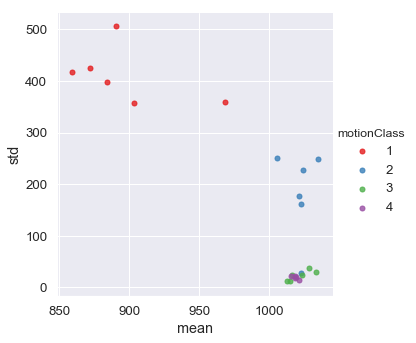

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

sns.lmplot('mean', 'std',
           data=features_and_labels,
           hue='motionClass',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 25});

In [24]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = features_and_labels[['mean','std']].values
result = features_and_labels['motionClass']
#print(points)
#print(result)
clf = svm.SVC(kernel = 'linear')
model = clf.fit(points, result)

#print('Vector of weights (w) = ',clf.coef_[0])
#print('b = ',clf.intercept_[0])
#print('Indices of support vectors = ', clf.support_)
#print('Support vectors = ', clf.support_vectors_)
#print('Number of support vectors for each class = ', clf.n_support_)
#print('Coefficients of the support vector in the decision function = ',
#       np.abs(clf.dual_coef_))


Text(0.5, 1.0, 'Freefall Detector')

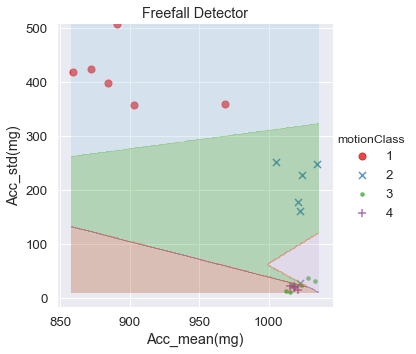

In [25]:
X = points
y = result
model = svm.SVC(kernel='linear').fit(X, y)
sns.lmplot('mean', 'std',
           data=features_and_labels,
           hue='motionClass',
           palette='Set1',
           fit_reg=False,
           #scatter_kws={"s": 100},markers=["o", "x",".","+"]);
           scatter_kws={"s": 50},markers=["o", "x", ".", "+"]);

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

plt.xlabel('Acc_mean(mg)')
plt.ylabel('Acc_std(mg)')
plt.title("Freefall Detector")

In [26]:
title = 'SVC with linear kernel'

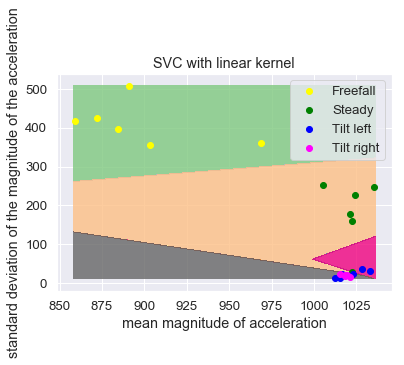

In [27]:
X=points
y=result
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/10
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['yellow', 'green', 'blue','magenta']
for color, i, target in zip(colors, [1, 2, 3, 4], ['Freefall','Steady','Tilt left','Tilt right']):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('mean magnitude of acceleration')
plt.ylabel('standard deviation of the magnitude of the acceleration')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [28]:
#Using the Classifier by executing the trained model and use it to predict
def ClassifyMyMotion(feature1, feature2):
    if(model.predict([[feature1, feature2]]))==1:
        print('Freefall!')
    elif(model.predict([[feature1, feature2]]))==2:
        print('Steady!')
    elif(model.predict([[feature1, feature2]]))==3:
        print('Tilt Left!')
    elif(model.predict([[feature1, feature2]]))==4:
        print('Tilt Right!')

In [30]:
#Given the mean and standard deviation of a kick the model can predict which kind of kick it is.
ClassifyMyMotion(22, 1000)
ClassifyMyMotion(1000, 22)
ClassifyMyMotion(1000, 10)
ClassifyMyMotion(1000, 15)
ClassifyMyMotion(1100, 16)
ClassifyMyMotion(1000, 17)
ClassifyMyMotion(1000, 18)
ClassifyMyMotion(1000, 20)

Freefall!
Tilt Right!
Tilt Right!
Tilt Right!
Tilt Left!
Tilt Right!
Tilt Right!
Tilt Right!
